In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("/content/drive/MyDrive/integerRanges.xlsx")

In [3]:
data.head()

,teaching,foreign language,study of history,arts skills,journalism,economic&stat,philosophy&psychology,Athletic&training,accounting&BIS,political&sciences,law&canon,target
0,2,7,6,0,6,8,1,1,3,8,2,سياسة واقتصاد
1,2,4,6,0,6,8,4,0,3,6,2,سياسة واقتصاد
2,1,3,5,0,7,10,4,0,4,10,3,سياسة واقتصاد
3,3,4,4,0,7,8,1,1,2,10,4,سياسة واقتصاد
4,2,7,6,2,4,8,3,0,5,7,3,سياسة واقتصاد


In [4]:
X = data.drop(columns='target')
Y = data['target'].copy()

In [5]:
pca = PCA(2) 
pca.fit(X) 
  
pca_data = pd.DataFrame(pca.transform(X)) 

Text(0, 0.5, '')

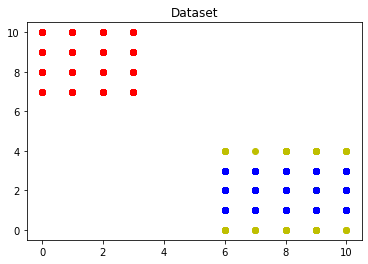

In [6]:
colors = {'سياسة واقتصاد':'r', 'السن':'g', 'تربية':'b', 'اداب':'y'}

fig, ax = plt.subplots()

for i in range(len(X)):
    ax.scatter(X['teaching'][i], X['economic&stat'][i],color=colors[Y[i]])

ax.set_title('Dataset')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0, 0.5, '')

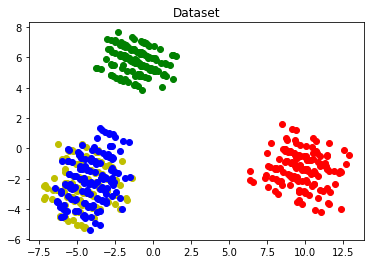

In [7]:
colors = {'سياسة واقتصاد':'r', 'السن':'g', 'تربية':'b', 'اداب':'y'}

fig, ax = plt.subplots()

for i in range(len(pca_data[0])):
    ax.scatter(pca_data[0][i], pca_data[1][i],color=colors[Y[i]])

ax.set_title('Dataset')
ax.set_xlabel('')
ax.set_ylabel('')

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [9]:
model = GaussianNB()

In [10]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
model.score(x_test, y_test)

0.9

In [12]:
y_pred = model.predict(x_test)

In [13]:
model.classes_

array(['اداب', 'السن', 'تربية', 'سياسة واقتصاد'], dtype='<U13')

In [14]:
confusion_matrix(y_test, y_pred)

array([[36,  0,  9,  0],
       [ 0, 45,  0,  0],
       [ 9,  0, 36,  0],
       [ 0,  0,  0, 45]])

In [15]:
#prob = model.predict_proba(x_test)

In [16]:
#output = []
#for i in range(len(model.classes_)):
  #output.append([model.classes_[i], prob[0][i]])

In [17]:
#ds = pd.DataFrame(output, columns = ['name', 'prob']) 

In [18]:
#ds.sort_values(by=['prob'],ascending=False)